# Movie Recommender System 
###### Sathwik Kesappragada

Does the recommended section provide satisfaction? Are the movie suggestions popping up elevate anyone’s mood? Do the advertisements appearing in between Instagram posts catch anybody’s attention? Is there a system that gives better movie suggestions? 

From the moment an individual unlocks his/her phone till the moment he/she puts it away, every action being committed is tracked and monitored, stored into data, that is confidential information sold to big corporations. Pew Research states that 81% of Americans own smartphones creating a push for relevant and accurate promotions that will influence a user’s decision-making process and attract customers. With complex supervision, people with smartphones are being schemed to stay on their cellular devices for long periods of time to generate more revenue. Why? Companies with money can afford exceptional marketing. According to Business Wire, 60% of consumers click on cellphone ads every week suggesting how prevalent mobile advertising has become. Given these points, everyone is simply surrounded by recommender systems; people are constantly getting pitched ideas. From a simple Google search to a YouTube video to a Netflix original and to a song on Spotify, there exists a machine that advises its user based off abundant data. 

## Part I.) Data Wrangling

#### Imports

In [87]:
#call all import statements and their necessary pacakges
import sys
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
import numpy as np
from ast import literal_eval
import seaborn as sns
import os

In [88]:
#load data into variable
movies = pd.read_csv('C:/Users/sathw/Desktop/Springboard_work/IMDB-Movie-Ratings/rawdata/movies_metadata.csv', index_col = 'title', low_memory = False, nrows = 46000)
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0
Jumanji,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0
Grumpier Old Men,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0
Waiting to Exhale,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0
Father of the Bride Part II,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0


In [89]:
#45466 movies 
movies.shape

(45466, 23)

In [90]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45466 entries, Toy Story to Queerama
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 

In [91]:
type(movies['budget'].iloc[0])
type(movies['popularity'].iloc[0])
#type(movies['genres'].iloc[0])

str

In [92]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['popularity'] = pd.to_numeric(movies['popularity'], errors = 'coerce')

In [93]:
#returns all movie titles
movies.index

Index([                  'Toy Story',                     'Jumanji',
                  'Grumpier Old Men',           'Waiting to Exhale',
       'Father of the Bride Part II',                        'Heat',
                           'Sabrina',                'Tom and Huck',
                      'Sudden Death',                   'GoldenEye',
       ...
                  'House of Horrors',   'Shadow of the Blair Witch',
               'The Burkittsville 7',             'Caged Heat 3000',
                        'Robin Hood',                      'Subdue',
               'Century of Birthing',                    'Betrayal',
                  'Satan Triumphant',                    'Queerama'],
      dtype='object', name='title', length=45466)

In [94]:
#looking at one element
movies[movies.original_title == 'Toy Story'].transpose()

title,Toy Story
adult,FALSE
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,3e+07
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
homepage,http://toystory.disney.com/toy-story
id,862
imdb_id,tt0114709
original_language,en
original_title,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ..."


In [95]:
#want to redo, with function
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [96]:
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [97]:
#checking how many null values there are for each column/feature
missing = pd.concat([movies.isnull().sum(), 100 * movies.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
belongs_to_collection,40972,90.115691
homepage,37684,82.883913
tagline,25054,55.104914
overview,954,2.098271
poster_path,386,0.848986
runtime,263,0.578454
release_date,87,0.191352
status,87,0.191352
imdb_id,17,0.037391
original_language,11,0.024194


In [98]:
#looking for duplicates in movie title
movies['original_title'].value_counts().head(15)

Hamlet                           8
Alice in Wonderland              8
Les Misérables                   7
Macbeth                          7
A Christmas Carol                7
The Three Musketeers             7
Cinderella                       7
Treasure Island                  6
Wuthering Heights                6
Frankenstein                     6
Jane Eyre                        6
The Hound of the Baskervilles    6
King Lear                        6
Blackout                         6
Heidi                            6
Name: original_title, dtype: int64

In [99]:
#sometimes movies with the same title are released
#you can tell theyre different by looking at release dates
movies[movies['original_title'] == 'Macbeth'].transpose()

title,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,A Performance of Macbeth,Macbeth
adult,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,0,1.5e+07,0,0
genres,[Drama],[Drama],[Thriller],"[Thriller, Drama, Action]","[History, Drama, War]","[Drama, Foreign]",[Drama]
homepage,NaN,NaN,NaN,NaN,http://www.macbeth-movie.com/,NaN,NaN
id,27883,115427,119844,13775,225728,41149,133448
imdb_id,tt0040558,tt0292081,tt0084284,tt0434541,tt2884018,tt0079499,tt1570337
original_language,en,hu,en,en,en,en,en
original_title,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth
overview,Orson Welles' unique take on Shakespeare's cla...,A Hungarian TV version of the play shot in jus...,Macbeth and his wife murder Duncan in order to...,"Macbeth, loyal to his crime boss, Duncan, is t...",Feature film adaptation of Shakespeare's Scott...,"Shakespeare's classic tragedy of ambition, wit...",Part of the PBS Great Performance Series. Reno...


In [100]:
#another method to identify duplicates 
(movies['original_title'] + ', ' + movies['release_date']).value_counts()

Blackout, 12/26/2008                                            3
The Viking, 6/21/1931                                           2
劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）, 7/6/2001                        2
The Warrior, 9/23/2001                                          2
A Place at the Table, 3/22/2012                                 2
                                                               ..
The Sklar Brothers: What Are We Talking About?, 4/29/2014       1
Make It Happen, 8/8/2008                                        1
Alla mia cara mamma nel giorno del suo compleanno, 8/22/1974    1
ジョゼと虎と魚たち, 12/13/2003                                           1
Stand Clear of the Closing Doors, 5/24/2014                     1
Length: 45349, dtype: int64

In [101]:
#literally everything is same
movies[movies['original_title'] == 'Blackout'].transpose()

title,Blackout,Blackout,Blackout,Blackout,Blackout,Blackout
adult,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,0,0,0
genres,"[Thriller, Mystery]","[Thriller, Mystery]","[Thriller, Mystery]","[Action, Thriller]","[Horror, Thriller]",[Documentary]
homepage,NaN,NaN,NaN,NaN,NaN,http://www.pbs.org/wgbh/americanexperience/fil...
id,141971,141971,141971,100063,226630,416951
imdb_id,tt1180333,tt1180333,tt1180333,tt0077241,tt0088816,tt4284046
original_language,fi,fi,fi,en,en,en
original_title,Blackout,Blackout,Blackout,Blackout,Blackout,Blackout
overview,Recovering from a nail gun shot to the head an...,Recovering from a nail gun shot to the head an...,Recovering from a nail gun shot to the head an...,A black comedy of violent criminals who terror...,A police officer suspects that a local husband...,"First responders, journalists, shop owners, th..."


In [102]:
movies[['original_title', 'release_date']].nunique()

original_title    43371
release_date      17336
dtype: int64

In [103]:
movies = movies.drop_duplicates(subset=['original_title', 'release_date'])

In [104]:
(movies['original_title'] + ', ' + movies['release_date']).value_counts()

The Joneses, 9/13/2009                         1
Colpo gobbo all'italiana, 5/4/1962             1
LolliLove, 11/21/2004                          1
The Foreigner, 1/1/1978                        1
Bonnie Scotland, 8/23/1935                     1
                                              ..
The Joyriders, 4/18/1999                       1
Papanasam, 7/3/2015                            1
Ocho apellidos catalanes, 11/20/2015           1
Re-Animator, 10/18/1985                        1
Stand Clear of the Closing Doors, 5/24/2014    1
Length: 45349, dtype: int64

In [105]:
movies[movies['original_title']=='Blackout'].transpose()

title,Blackout,Blackout,Blackout,Blackout
adult,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN
budget,0,0,0,0
genres,"[Thriller, Mystery]","[Action, Thriller]","[Horror, Thriller]",[Documentary]
homepage,NaN,NaN,NaN,http://www.pbs.org/wgbh/americanexperience/fil...
id,141971,100063,226630,416951
imdb_id,tt1180333,tt0077241,tt0088816,tt4284046
original_language,fi,en,en,en
original_title,Blackout,Blackout,Blackout,Blackout
overview,Recovering from a nail gun shot to the head an...,A black comedy of violent criminals who terror...,A police officer suspects that a local husband...,"First responders, journalists, shop owners, th..."


In [106]:
#checking to see how many revenue values are 0
count_revenue_zero = sum(map(lambda x : x == 0, movies['revenue']))
print(count_revenue_zero)

38032


In [107]:
#for some odd reason this is giving the wrong count
#there exists elements in the df that have 0 under budget
count_budget_zero = sum(map(lambda x : x == 0, movies['budget']))
print(count_budget_zero)

36553


In [108]:
#print(type(movies['popularity'].iloc[0]))
count_pop_zero = sum(map(lambda x : x == 0, movies['popularity']))
print(count_pop_zero)

66


In [109]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors = 'coerce')
oldest_movie_bydate = movies.release_date.min()
most_recent_bydate = movies.release_date.max()

In [110]:
print(oldest_movie_bydate)
print(most_recent_bydate)

1874-12-09 00:00:00
2020-12-16 00:00:00


In [111]:
movies[movies['release_date'] == oldest_movie_bydate]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Passage of Venus,FALSE,NaN,0.0,[Documentary],NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,[France],1874-12-09,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,False,6.0,19.0


In [112]:
movies[movies['release_date'] == most_recent_bydate]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Avatar 2,FALSE,"{'id': 87096, 'name': 'Avatar Collection', 'po...",0.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,76600,tt1630029,en,Avatar 2,A sequel to Avatar (2009).,...,[United States of America],2020-12-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",In Production,NaN,False,0.0,58.0


In [113]:
movies[movies['release_date'] > '2018-01-01 00:00:00']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Avatar 2,FALSE,"{'id': 87096, 'name': 'Avatar Collection', 'po...",0.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,76600,tt1630029,en,Avatar 2,A sequel to Avatar (2009).,...,[United States of America],2020-12-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",In Production,NaN,False,0.0,58.0
Bad Boys for Life,FALSE,"{'id': 14890, 'name': 'Bad Boys Collection', '...",0.0,"[Thriller, Action, Crime]",NaN,38700,tt1502397,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,...,[United States of America],2018-11-07,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,False,0.0,12.0
Iron Sky: The Coming Race,FALSE,"{'id': 312977, 'name': 'Iron Sky Collection', ...",18000000.0,"[Action, Comedy, Fantasy, Science Fiction]",http://www.ironsky.net/,302349,tt3038708,en,Iron Sky: The Coming Race,"Twenty years after the events of Iron Sky, the...",...,"[Belgium, Finland, Germany]",2018-03-01,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Post Production,NaN,False,0.0,0.0
Mary Shelley,FALSE,NaN,0.0,"[Drama, Romance]",NaN,332283,tt3906082,en,Mary Shelley,The love affair between poet Percy Shelley and...,...,"[Ireland, Luxembourg, United Kingdom]",2018-04-25,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0
The Other Side of the Wind,FALSE,NaN,12000000.0,"[Comedy, Drama]",NaN,299782,tt0069049,en,The Other Side of the Wind,"Orson Welles' unfinished masterpiece, restored...",...,"[Iran, United States of America]",2018-12-31,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0
Mobile Homes,FALSE,NaN,0.0,[Drama],NaN,412059,tt5613402,en,Mobile Homes,"In forgotten towns along the American border, ...",...,"[France, Canada]",2018-04-04,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0


In [114]:
movies['genres'].value_counts()

[Drama]                                                                           4996
[Comedy]                                                                          3620
[Documentary]                                                                     2721
[]                                                                                2442
[Drama, Romance]                                                                  1300
                                                                                  ... 
[Action, Adventure, Animation, Comedy, Family, Horror]                               1
[Drama, Thriller, Documentary]                                                       1
[Action, Animation, Comedy, Science Fiction]                                         1
[Drama, Horror, Family]                                                              1
[Fantasy, Animation, Drama, Science Fiction, Romance, Foreign, Family, Comedy]       1
Name: genres, Length: 4069, dtype: int64

In [115]:
#drama_genres = movies['genres'].groupby(['Drama']).sum()
#print(drama_genres)
#movies_genres_means = movies.groupby(by='genres')['vote_average'].mean()
#movies_genres_means.head()
movies['genres'].filter(regex= 'Drama|Comedy').count()

59

In [116]:
#print(movies.columns.isin(movies.genres).any())
movies['1orMore'] = movies['genres'].str.len()

#for row in movies['genres']:
#    if(movies['genres'].length) > 1 ):
#        movies['1orMore'] = 0
#    else:
#       movies['1orMore'] = 1
movies['1orMore']    

title
Toy Story                      3
Jumanji                        3
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    1
                              ..
Subdue                         2
Century of Birthing            1
Betrayal                       3
Satan Triumphant               0
Queerama                       0
Name: 1orMore, Length: 45436, dtype: int64

In [117]:
movies['1orMore'].value_counts() #2442 movies don't have any genre 

1    14552
2    14471
3     9579
4     3378
0     2442
5      830
6      157
7       24
8        3
Name: 1orMore, dtype: int64

In [118]:
movie_with_one = movies[movies['1orMore'] == 1]

In [119]:
movie_with_two = movies[movies['1orMore'] == 2]

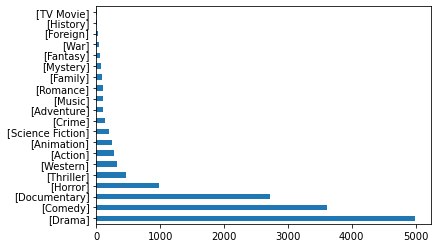

In [120]:
movie_with_one['genres'].value_counts().plot(kind='barh') # 20 unique single genres

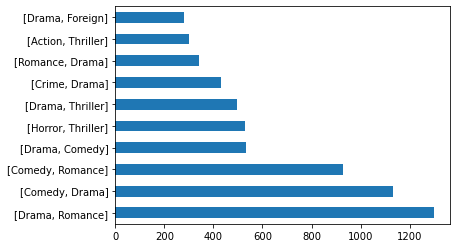

In [121]:
movie_with_two['genres'].value_counts().head(10).plot(kind ='barh') #303 unique pairs

In [122]:
movie_genres_key=movie_with_one['genres'].apply(lambda x: '_'.join((map(str,x))))

Text(0.5, 0, 'vote average')

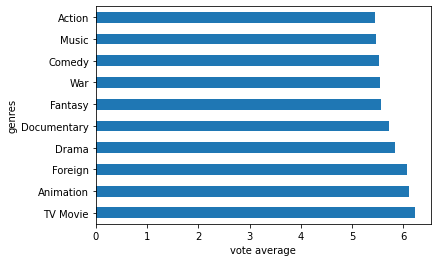

In [123]:
vap = movie_with_one.groupby(movie_genres_key)['vote_average'].mean()
vap = vap.sort_values(ascending = False)
vap.head(10).plot(kind='barh')
plt.xlabel('vote average')

In [124]:
movie_with_one[movie_genres_key == 'TV Movie']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,1orMore
title,,,,,,,,,,,,,,,,,,,,,
David Copperfield,FALSE,NaN,0.0,[TV Movie],NaN,141640,tt0238768,it,David Copperfield,An orphan with a rough childhood becomes a bar...,...,2001-12-25,0.0,0.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,False,4.8,5.0,1
The Pretender 2001,FALSE,NaN,0.0,[TV Movie],NaN,27338,tt0271732,en,The Pretender 2001,Jarod reunites with two old friends and unleas...,...,2001-01-22,0.0,96.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,He is a master of disguise. She is a master of...,False,5.4,5.0,1
Gangsta Granny,FALSE,NaN,0.0,[TV Movie],NaN,245739,tt3286484,en,Gangsta Granny,A young boy is bored spending time with his du...,...,2013-12-26,0.0,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,4.8,8.0,1
Naughty or Nice,FALSE,NaN,0.0,[TV Movie],NaN,145711,tt2417134,en,Naughty or Nice,Krissy Kringle receives a delivery intended fo...,...,2012-12-24,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,6.1,19.0,1
October Kiss,FALSE,NaN,0.0,[TV Movie],NaN,362884,tt5076032,en,October Kiss,Poppy Summerall is hired near Halloween as a t...,...,2015-10-17,0.0,84.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,6.5,6.0,1
Den radio,FALSE,NaN,0.0,[TV Movie],NaN,143883,tt5952180,ru,День Радио (Спектакль),NaN,...,2001-03-24,0.0,0.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,False,9.0,5.0,1
The Idiot,FALSE,NaN,0.0,[TV Movie],NaN,444623,tt0366028,ru,Idiot,TV miniseries of the Dostoevsky novel.,...,2003-04-01,0.0,550.0,[],Released,NaN,False,7.0,1.0,1


Text(0.5, 0, 'popularity')

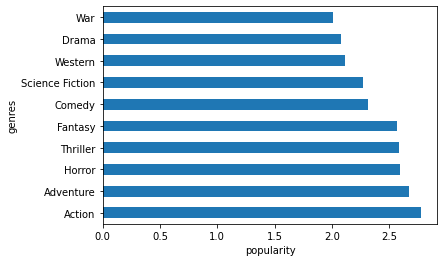

In [125]:
pap = movie_with_one.groupby(movie_genres_key)['popularity'].mean()
pap = pap.sort_values(ascending = False)
pap.head(10).plot(kind= 'barh')
plt.xlabel('popularity')

Text(0.5, 0, 'vote count')

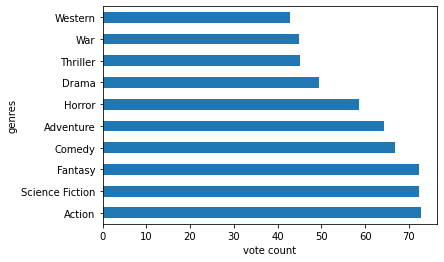

In [126]:
vcap = movie_with_one.groupby(movie_genres_key)['vote_count'].mean()
vcap = vcap.sort_values(ascending = False)
vcap.head(10).plot(kind= 'barh')
plt.xlabel('vote count')

In [127]:
mgk=movies['genres'].apply(lambda x: '_'.join((map(str,x))))

Text(0.5, 0, 'vote average')

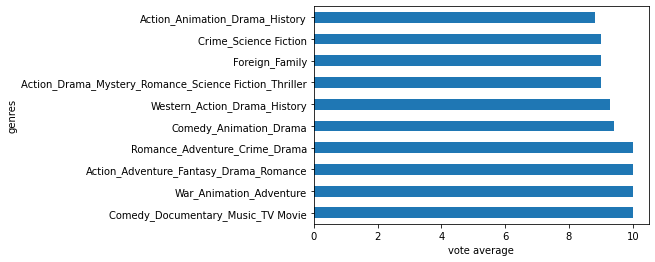

In [128]:
mvap = movies.groupby(mgk)['vote_average'].mean()
mvap= mvap.sort_values(ascending = False)
mvap.head(10).plot(kind= 'barh')
plt.xlabel('vote average')

In [129]:
mvap.head(10)

genres
Comedy_Documentary_Music_TV Movie                        10.0
War_Animation_Adventure                                  10.0
Action_Adventure_Fantasy_Drama_Romance                   10.0
Romance_Adventure_Crime_Drama                            10.0
Comedy_Animation_Drama                                    9.4
Western_Action_Drama_History                              9.3
Action_Drama_Mystery_Romance_Science Fiction_Thriller     9.0
Foreign_Family                                            9.0
Crime_Science Fiction                                     9.0
Action_Animation_Drama_History                            8.8
Name: vote_average, dtype: float64

In [130]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,45433.0,4.224549e+06,1.742799e+07,0.0,0.000000,0.000000,0.000000,3.800000e+08
popularity,45430.0,2.921206e+00,6.006708e+00,0.0,0.385872,1.127238,3.678128,5.474883e+02
revenue,45430.0,1.121288e+07,6.435213e+07,0.0,0.000000,0.000000,0.000000,2.787965e+09
runtime,45173.0,9.412430e+01,3.841554e+01,0.0,85.000000,95.000000,107.000000,1.256000e+03
vote_average,45430.0,5.618329e+00,1.924139e+00,0.0,5.000000,6.000000,6.800000,1.000000e+01
vote_count,45430.0,1.099360e+02,4.914663e+02,0.0,3.000000,10.000000,34.000000,1.407500e+04
1orMore,45436.0,2.003411e+00,1.130823e+00,0.0,1.000000,2.000000,3.000000,8.000000e+00


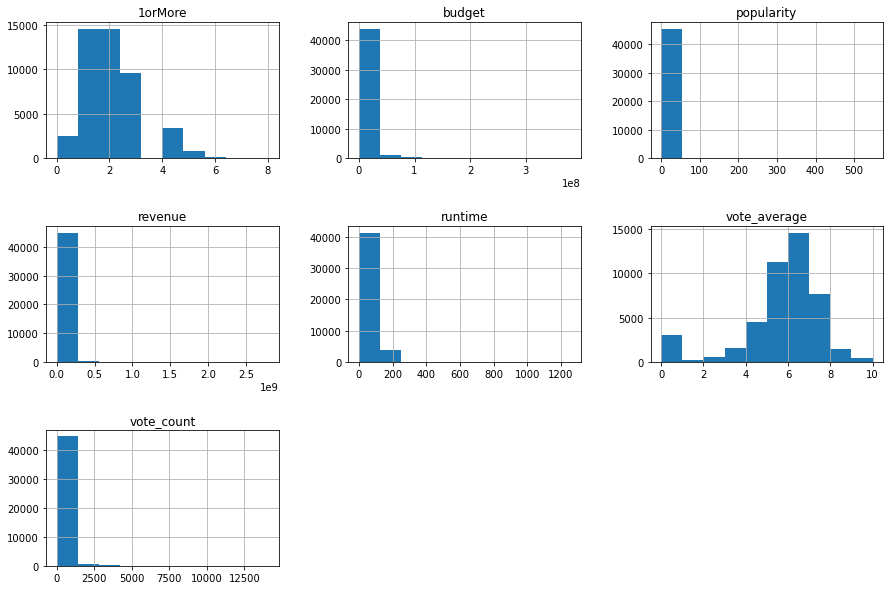

In [131]:
movies.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

In [132]:
movie_small = pd.melt(movies, id_vars = 'original_title', value_vars = ['genres'], value_name = 'Genre')

#movie_small = pd.melt(movies, 
#                        id_vars = ['original_title', 'vote_average', 'vote_count', 'id', 'genres', 
#                                   'popularity','release_date', 'budget', 'revenue', 'runtime'])

In [133]:
movie_small.head()

,original_title,variable,Genre
0,Toy Story,genres,"[Animation, Comedy, Family]"
1,Jumanji,genres,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,genres,"[Romance, Comedy]"
3,Waiting to Exhale,genres,"[Comedy, Drama, Romance]"
4,Father of the Bride Part II,genres,[Comedy]


In [134]:
#movie_small = movie_small.rename(columns = {'original_title': 'title'})

In [135]:
#movie_small.dtypes

In [136]:
#movie_small['id'] = pd.to_numeric(movie_small['id'], errors = 'coerce')

In [137]:
#movie_small.dtypes

In [138]:
#movie_small.isnull().sum()

In [139]:
#movie_small[movie_small['id'].isna()]

In [140]:
#movie_small_non = movie_small[movie_small['vote_average'].notna()]

In [141]:
#movie_small_non.head()

In [142]:
#movie_small_non.count()

In [143]:
ratings = pd.read_csv('C:/Users/sathw/Desktop/Springboard_work/IMDB-Movie-Ratings/rawdata/ratings.csv', nrows = 200000, low_memory = False)
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [144]:
ratings = ratings.rename(columns = {'movieId': 'id'})

In [145]:
ratings.id = ratings.id.astype(float)

In [146]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     200000 non-null  int64  
 1   id         200000 non-null  float64
 2   rating     200000 non-null  float64
 3   timestamp  200000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 6.1 MB


In [147]:
#combined_df = pd.merge(diff_look_clean,ratings, on = 'id')

In [148]:
#combined_df.info()

movie['post_proc'] = movie[genres'].apply(clean, axis=1)

In [149]:
#combined_df.head(10)

In [150]:
#combined_df.groupby(by ='title')[['vote_average', 'vote_count']].max().sort_values(by = 'vote_count', ascending = False)

In [151]:
#basically a vote count <- checks for duplicates
#combined_df['title'].value_counts()

In [152]:
#combined_df[combined_df['title'].str.contains('Jaws')]